## Hamir Ranavaya 8802243
#### Assignment 3

### Part 1

In [300]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets

In [301]:
# Importing data
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
new_data = data[['petal length (cm)', 'petal width (cm)']]
new_data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [302]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [303]:
inertia_values = []
possible_k_values = range(1, 11)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    

C:\Users\ranah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ranah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ranah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

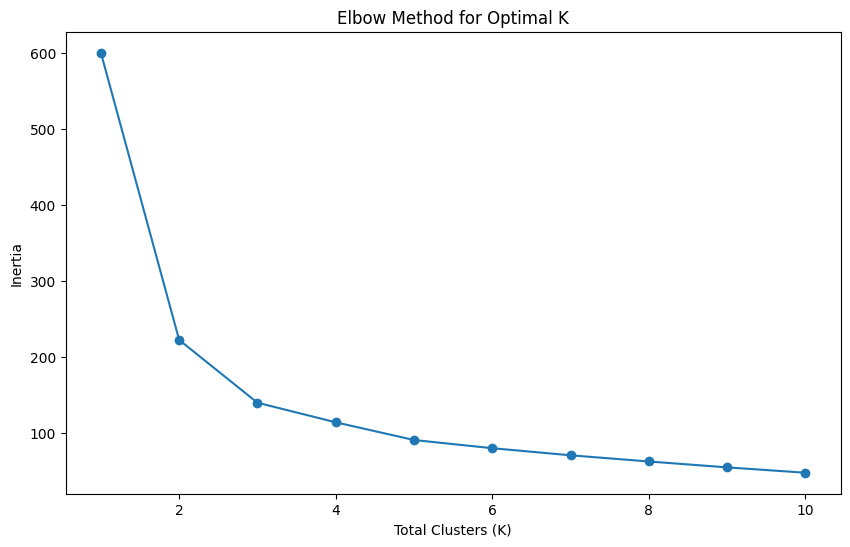

In [304]:
# Plotting the graph for Elbow method for optimal K
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Total Clusters (K)')
plt.ylabel('Inertia')
plt.show()

## Part 2

In [305]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [306]:
path = 'C:/Users/ranah/OneDrive/Desktop/AIML/artificial_intelligence_algorithm/heart.csv'
data = pd.read_csv(path)
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0     40   M           ATA        140          289          0     Normal  \
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [307]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [308]:
# Removing the outliers using z score method
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS','MaxHR','HeartDisease']
z_score = stats.zscore(data[z_score_cols])
zscores = stats.zscore(data[z_score_cols])
threshold = 3
outliers = (z_score > 3) | (z_score < -3)
removed_outliers = data[~outliers]


In [309]:
# Converting text columns to numbers
def encode_categorical_columns(dataframe, columns_to_label_encode, columns_to_onehot_encode):
    label_encoder = LabelEncoder()
    for col in columns_to_label_encode:
        dataframe[col] = label_encoder.fit_transform(dataframe[col])
        
    dataframe = pd.get_dummies(dataframe, columns=columns_to_onehot_encode, drop_first=True)
    return dataframe
    data = pd.concat([data, onehot_encoded], axis=1)
    return dataframe

In [310]:
# Applying Scaling
def apply_scaling(dataframe, columns_to_scale):
    scaler = StandardScaler
    num_cols = ['Age', 'MaxHR', 'RestingBP', 'Cholesterol', 'HeartDisease']
    data[num_cols] = scaler.fit_transform(data[num_cols])

    return dataframe

label_encode = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
onehot_encode = ["ChestPainType", "RestingECG", "ST_Slope"]

new_data = df = encode_categorical_columns(data, label_encode, onehot_encode)

Calculating the Accuracies for SVM, Logistic Regression and Random Forest Classifer

In [311]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
accuracy_of_SVM = accuracy_score(y_test, svm_predictions)

In [312]:
svm_classifier = SVC(kernel='linear', random_state=42)
logistic_regression_classifier = LogisticRegression(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)

In [313]:
svm_classifier.fit(X_train, y_train)
logistic_regression_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)

C:\Users\ranah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [314]:
svm_prediction = svm_classifier.predict(X_test)
logistic_regression_predictions = logistic_regression.predict(X_test)
random_forest_prediction = random_forest.predict(X_test)

In [315]:
svm_accuracy = accuracy_score(y_test, svm_prediction)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_prediction)

print("Accuracy_of_SVM:", svm_accuracy)
print("Accuracy_of_Logistic_Regression_Accuracy:", logistic_regression_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

Accuracy_of_SVM: 0.8369565217391305
Accuracy_of_Logistic_Regression_Accuracy: 0.842391304347826
Random Forest Accuracy: 0.8804347826086957


Calculating the Accuracies for SVM, Logistic Regression and Random Forest Classifer by PCA

In [316]:
num_components = 0.95
pca = PCA(n_components=0.95)
pca_for_X_train = pca.fit_transform(X_train)
pca_for_X_test = pca.transform(X_test)

pca_model_accuracies = {}

In [317]:
svm_model_pca = SVC()
svm_model_pca.fit(pca_for_X_train, y_train)
svm_pred_pca = svm_model_pca.predict(pca_for_X_test)
pca_model_accuracies['Accuracy of SVM after PCA'] = accuracy_score(y_test, svm_pred_pca)
print(pca_model_accuracies['Accuracy of SVM after PCA'])

0.6739130434782609


In [318]:
pca_for_logistic_regression = LogisticRegression(max_iter=10000)
pca_for_logistic_regression.fit(pca_for_X_train, y_train)
pca_for_logistic_regression_prediction = pca_for_logistic_regression.predict(pca_for_X_test)
pca_model_accuracies['Accuracy of Logistic Regression after PCA'] = accuracy_score(y_test, pca_for_logistic_regression_prediction)
print(pca_model_accuracies['Accuracy of Logistic Regression after PCA'])

0.6358695652173914


In [319]:
pca_for_random_forest_classifier = RandomForestClassifier()
pca_for_random_forest_classifier.fit(pca_for_X_train, y_train)
pca_for_random_forest_prediction = pca_for_random_forest_classifier.predict(pca_for_X_test)
pca_model_accuracies['Accuracy of Random Forest after PCA'] = accuracy_score(y_test, pca_for_random_forest_prediction)
print(pca_model_accuracies['Accuracy of Random Forest after PCA'])

0.6793478260869565


Here we can see that the accuracies changes for each classification models.

1. SVM :- The accuracy of SVM before applying PCA works better with 83%.
2. Logistic Regression :- The accuracy of Logistic Regression outperforms the accuracy after applying PCA with 84%.
3. Random Forest :- The accuracy of Random Forest classifier has better accuracy before applying PCA with 88%.

Hence, after reviewing all the three accuracies before and after applying PCA we can see that the model works with high accuracy without applying PCA.